# Time Series Visualizer

##### This is one of the projects developed to claim Data Analysis with Python Certification of freecodecamp web page. Step by step will be showing the results 

In [144]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data and setting index column to 'date'.)
df = pd.read_csv("fcc-forum-pageviews.csv",index_col="date",parse_dates=True)

# Clean data
df = df[df["value"].between(df["value"].quantile(.025),df["value"].quantile(.975))]
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


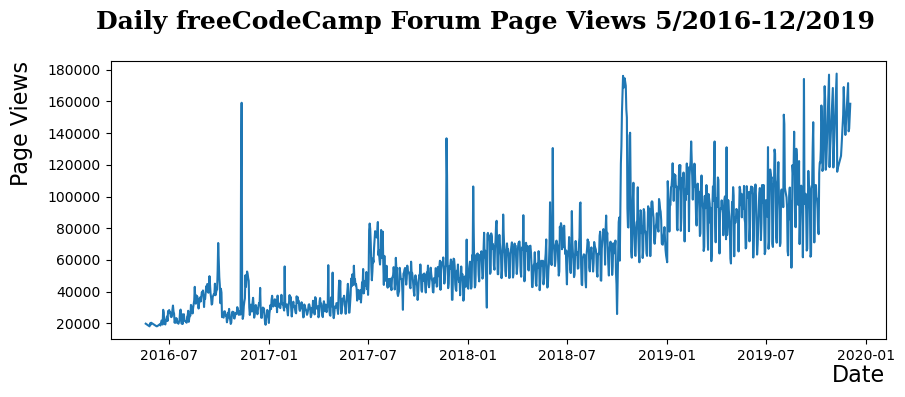

In [145]:
month=["January","February","March","April","May","June","July","August","September","October","November","December"]
def draw_line_plot():
    # Draw line plot
    fig,ax=plt.subplots(figsize=(10,4),dpi=100)
    plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019",fontsize=18,y=0.9,transform=fig.transFigure,fontweight="bold",fontfamily="serif")

    ax=sns.lineplot(data=df,legend=False)
    #ax.set(title="Daily freeCodeCamp Forum Page Views 5/2016-12/2019",xlabel="Period",ylabel="Page Views")
    #ax.set(xlabel="Period",ylabel="Page Views")
    #xaxis properties
    ax.set_xlabel("Date",ha="right",fontsize=16,y=0.1,fontweight="regular",fontfamily="sans")
    ax.xaxis.set_label_coords(x=1,y=-0.09,transform=ax.transAxes)
    
    #yaxis properties
    ax.set_ylabel("Page Views",ha="right",fontsize=16,fontweight="regular",fontfamily="sans")
    ax.yaxis.set_label_coords(x=-0.1,y=1,transform=ax.transAxes)
    
    ax.tick_params(axis="both",labelsize=10)
    plt.subplots_adjust(top=0.82)
    
    
    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    #return fig
draw_line_plot()

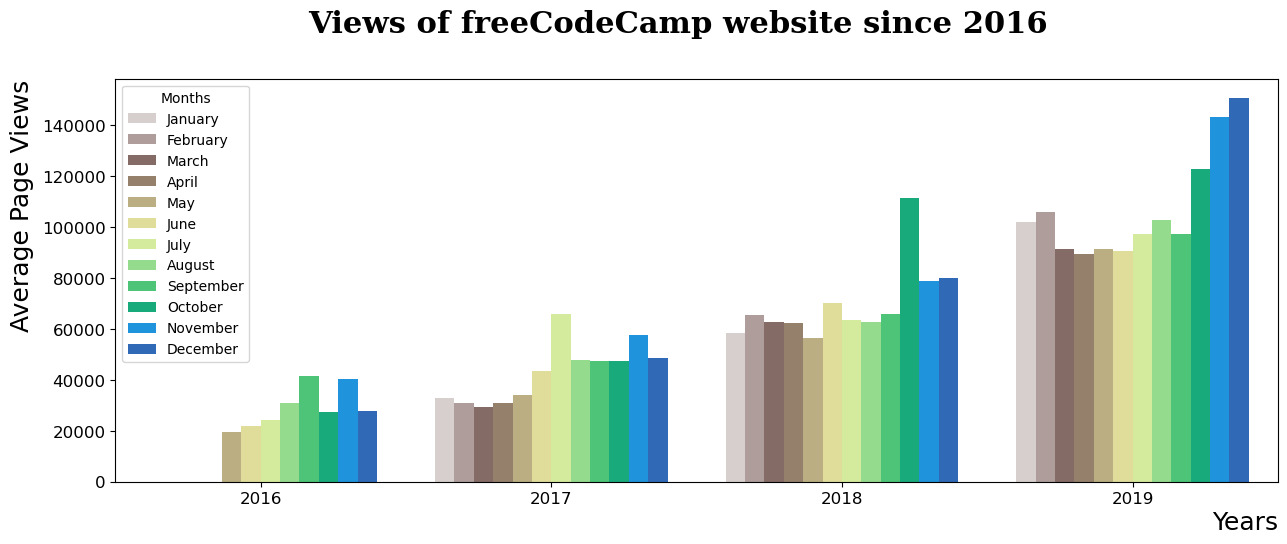

In [146]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar["year"]=df.index.year.values
    df_bar["Months"]=df.index.month_name()
    # Draw bar plot
    fig,ax=plt.subplots(figsize=(15,5.8),dpi=100)
    
    plt.title('Views of freeCodeCamp website since 2016',fontsize=22,y=0.9,transform=fig.transFigure,fontweight="bold",fontfamily="serif")
    ax=sns.barplot(x="year",hue="Months",y="value",data=df_bar,hue_order=months,ci=None,palette="terrain_r")
    #ax.set(xlabel="Years",ylabel="Average Page Views")
    
    #xaxis properties
    ax.set_xlabel("Years",ha="right",fontsize=18,y=0.1,fontweight="regular",fontfamily="sans")
    ax.xaxis.set_label_coords(x=1,y=-0.07,transform=ax.transAxes)
    
    #yaxis properties
    ax.set_ylabel("Average Page Views",ha="right",fontsize=18,fontweight="regular",fontfamily="sans")
    ax.yaxis.set_label_coords(x=-0.07,y=1,transform=ax.transAxes)
    
    ax.tick_params(axis="both",labelsize=12)
    plt.subplots_adjust(top=0.82)
    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    #return fig
draw_bar_plot()

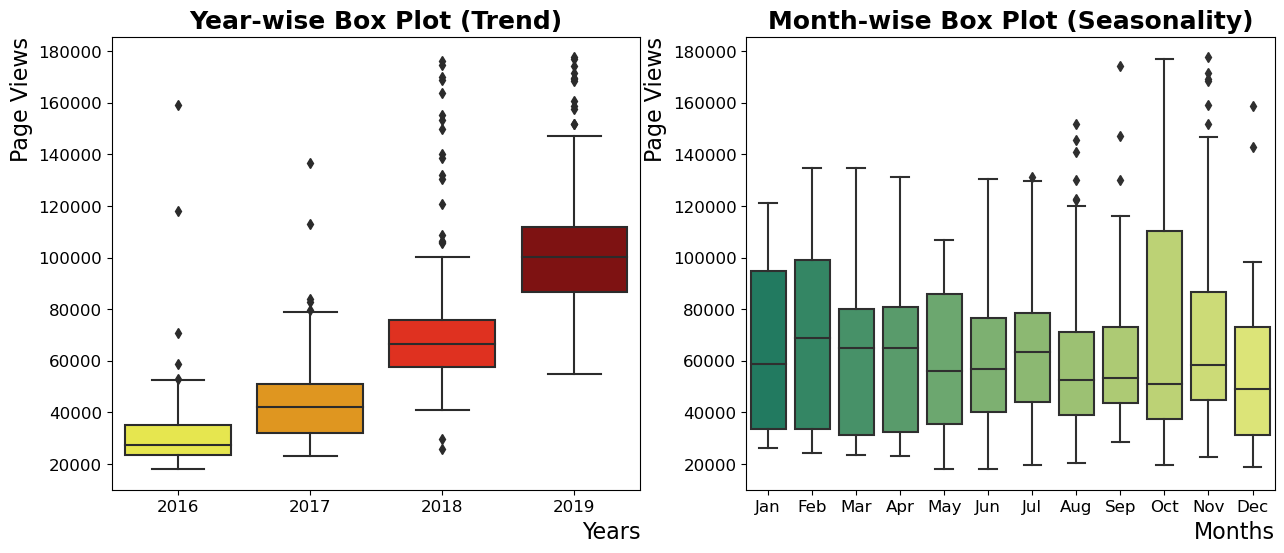

In [139]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)

    df_box["monthnumber"]=df.index.month
    df_box=df_box.sort_values("monthnumber")
    
    fig,ax=plt.subplots(1,2,figsize=(15,6),dpi=100)
    sns.boxplot(y="value",x="year",data=df_box,ax=ax[0],palette="hot_r")
    
    #ax[0].set(xlabel="Year",ylabel="Page Views",title="Year-wise Box Plot (Trend)")
    #title properties ax[0]
    ax[0].set_title("Year-wise Box Plot (Trend)",fontsize=18,fontweight="bold",fontfamily="sans")
    #xaxis properties ax[0]
    ax[0].set_xlabel("Years",loc="right",fontsize=16,fontweight="regular",fontfamily="sans")
    #yaxis properties ax[0]
    ax[0].set_ylabel("Page Views",loc="top",fontsize=16,fontweight="regular",fontfamily="sans")
    ax[0].tick_params(axis="both",labelsize=12)
    
    
    
    sns.boxplot(y="value",x="month",data=df_box,ax=ax[1],palette="summer")
    #ax[1].set(xlabel="Month",ylabel="Page Views",title="Month-wise Box Plot (Seasonality)")
    #title properties ax[1]
    ax[1].set_title("Month-wise Box Plot (Seasonality)",fontsize=18,fontweight="bold",fontfamily="sans")
    #xaxis properties ax[1]
    ax[1].set_xlabel("Months",loc="right",fontsize=16,fontweight="regular",fontfamily="sans")
    #yaxis properties ax[1]
    ax[1].set_ylabel("Page Views",loc="top",fontsize=16,fontweight="regular",fontfamily="sans")
    
    
    ax[1].tick_params(axis="both",labelsize=12)
    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    #return fig
draw_box_plot()

## Now the project it's ready